In [9]:
#Predicting ratings of a movie based on its features such as Title,Genre,Actor, Directors, and Year

In [23]:
import pandas as pd
df= pd.read_csv(r"C:\Users\NISHA\Desktop\yashikaclg\movies.csv", encoding = 'unicode_escape')

In [24]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [25]:
df.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [27]:
df = df[['Name', 'Genre', 'Year', 'Director', 'Actor 1', 'Actor 2', 'Actor 3', 'Rating']].dropna(subset=['Genre', 'Director', 'Actor 1', 'Rating']).copy()

In [28]:
df['Actor'] = df['Actor 1'] + ', ' + df['Actor 2'] + ', ' + df['Actor 3']

In [29]:
df.drop(columns=[ 'Actor 1', 'Actor 2', 'Actor 3'])

,Name,Genre,Year,Director,Rating,Actor
1,#Gadhvi (He thought he was Gandhi),Drama,(2019),Gaurav Bakshi,7.0,"Rasika Dugal, Vivek Ghamande, Arvind Jangid"
3,#Yaaram,"Comedy, Romance",(2019),Ovais Khan,4.4,"Prateik, Ishita Raj, Siddhant Kapoor"
5,...Aur Pyaar Ho Gaya,"Comedy, Drama, Musical",(1997),Rahul Rawail,4.7,"Bobby Deol, Aishwarya Rai Bachchan, Shammi Kapoor"
6,...Yahaan,"Drama, Romance, War",(2005),Shoojit Sircar,7.4,"Jimmy Sheirgill, Minissha Lamba, Yashpal Sharma"
8,?: A Question Mark,"Horror, Mystery, Thriller",(2012),Allyson Patel,5.6,"Yash Dave, Muntazir Ahmad, Kiran Bhatia"
...,...,...,...,...,...,...
15501,Zulm Ki Hukumat,"Action, Crime, Drama",(1992),Bharat Rangachary,5.3,"Dharmendra, Moushumi Chatterjee, Govinda"
15503,Zulm Ki Zanjeer,"Action, Crime, Drama",(1989),S.P. Muthuraman,5.8,"Chiranjeevi, Jayamalini, Rajinikanth"
15504,Zulm Ko Jala Doonga,Action,(1988),Mahendra Shah,4.6,"Naseeruddin Shah, Sumeet Saigal, Suparna Anand"
15505,Zulmi,"Action, Drama",(1999),Kuku Kohli,4.5,"Akshay Kumar, Twinkle Khanna, Aruna Irani"


In [31]:
from sklearn.preprocessing import LabelEncoder
le_genre = LabelEncoder()
le_director = LabelEncoder()
le_actor = LabelEncoder()
df['Genre'] = le_genre.fit_transform(df['Genre'])
df['Director'] = le_director.fit_transform(df['Director'])
df['Actor'] = le_actor.fit_transform(df['Actor'])

In [47]:
x = df[['Genre', 'Director', 'Actor', 'Year']]
y = df['Rating']
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
df.dropna(subset=['Year'], inplace=True)
df['Year'] = df['Year'].astype(int)

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
x_train,x_test,y_train,y_test= train_test_split(x,y, test_size=0.2, random_state=42)

In [49]:
print(x_train.isnull().sum())
print(y_train.isnull().sum())

Genre          0
Director       0
Actor          0
Year        6165
dtype: int64
0


In [50]:
print(x_train.dtypes)

Genre         int64
Director      int64
Actor         int64
Year        float64
dtype: object


In [53]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print("RMSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

RMSE: 1.7562021520163218
R2 Score: 0.08998947166096927


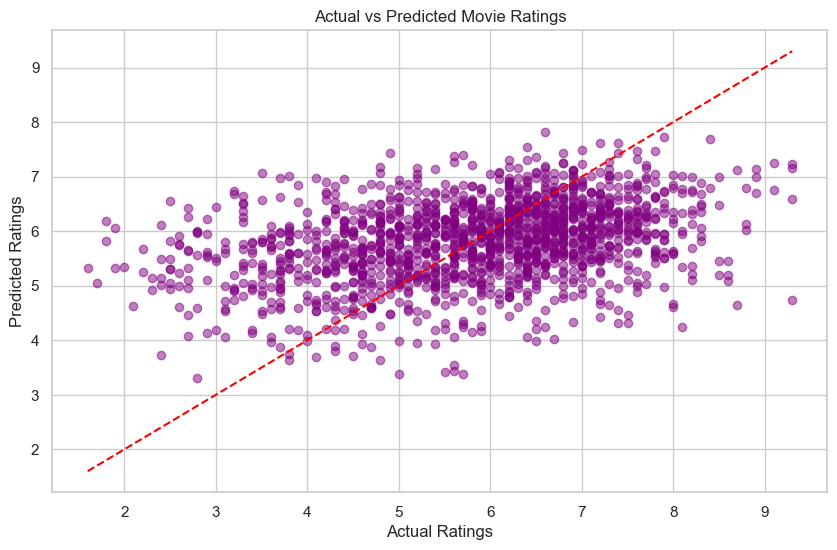

In [59]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred, alpha=0.5, color='purple')
plt.xlabel("Actual Ratings")
plt.ylabel("Predicted Ratings")
plt.title("Actual vs Predicted Movie Ratings")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--') # Ideal line
plt.show()